#Python 101 @ SzISz VIII.
---
##Today: Dataframes, and visualization


### Act I: Get the data!

In [1]:
from IPython.display import Image
Image(url='http://www.london24.com/polopoly_fs/1.3024317.1385128334!/image/4183113330.jpg_gen/derivatives/landscape_630/4183113330.jpg')

Scrape the 2014 hungarian voting results

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
VOTE_BASE = 'http://valasztas.hu/dyn/pv14/szavossz/hu/'
OVERALL = 'oevker.html'
BASE_URI = '../data/'

In [4]:
vote_response = requests.get(VOTE_BASE + OVERALL)
print vote_response.status_code

200


In [5]:
vote_soup = BeautifulSoup(vote_response.content)
containers = vote_soup.find('table', {'border': '1'}).findAll('tr')
print containers

[<tr>
<th width="20%">Megye/Főváros</th>
<th width="4%">OEVK</th>
<th width="16%">OEVK székhely település</th>
<th width="25%">Az első helyen álló jelölt neve</th>
<th width="29%">Jelöltet állító<br/>párt(ok)</th>
<th width="6%">Feldolgozás állása</th>
</tr>, <tr>
<td rowspan="1">BUDAPEST</td>
<td rowspan="1" style="text-align:center;"><a href="M01/E01/evkjkv.html">01</a></td>
<td rowspan="1">Budapest V.ker.</td>
<td><a href="../../vertaj/hu/J/5/9/3/j51-6178593.html"> Rogán Antal </a></td>
<td>FIDESZ-KDNP</td>
<td rowspan="1" style="text-align:right;">100.0 %</td>
</tr>, <tr>
<td rowspan="1">BUDAPEST</td>
<td rowspan="1" style="text-align:center;"><a href="M01/E02/evkjkv.html">02</a></td>
<td rowspan="1">Budapest XI.ker.</td>
<td><a href="../../vertaj/hu/J/1/8/0/j51-2243180.html">Dr. Simicskó István </a></td>
<td>FIDESZ-KDNP</td>
<td rowspan="1" style="text-align:right;">100.0 %</td>
</tr>, <tr>
<td rowspan="1">BUDAPEST</td>
<td rowspan="1" style="text-align:center;"><a href="M01/E03/e

In [6]:
# get the items out of the tablerows
rows = [row.findAll('td') for row in containers]
print rows

[[], [<td rowspan="1">BUDAPEST</td>, <td rowspan="1" style="text-align:center;"><a href="M01/E01/evkjkv.html">01</a></td>, <td rowspan="1">Budapest V.ker.</td>, <td><a href="../../vertaj/hu/J/5/9/3/j51-6178593.html"> Rogán Antal </a></td>, <td>FIDESZ-KDNP</td>, <td rowspan="1" style="text-align:right;">100.0 %</td>], [<td rowspan="1">BUDAPEST</td>, <td rowspan="1" style="text-align:center;"><a href="M01/E02/evkjkv.html">02</a></td>, <td rowspan="1">Budapest XI.ker.</td>, <td><a href="../../vertaj/hu/J/1/8/0/j51-2243180.html">Dr. Simicskó István </a></td>, <td>FIDESZ-KDNP</td>, <td rowspan="1" style="text-align:right;">100.0 %</td>], [<td rowspan="1">BUDAPEST</td>, <td rowspan="1" style="text-align:center;"><a href="M01/E03/evkjkv.html">03</a></td>, <td rowspan="1">Budapest XII.ker.</td>, <td><a href="../../vertaj/hu/J/3/9/8/j51-3379398.html">Dr. Fónagy János Vilmos</a></td>, <td>FIDESZ-KDNP</td>, <td rowspan="1" style="text-align:right;">100.0 %</td>], [<td rowspan="1">BUDAPEST</td>, <

In [7]:
# we've got an unneeded first row, remove it!
rows = rows[1:]
print rows

[[<td rowspan="1">BUDAPEST</td>, <td rowspan="1" style="text-align:center;"><a href="M01/E01/evkjkv.html">01</a></td>, <td rowspan="1">Budapest V.ker.</td>, <td><a href="../../vertaj/hu/J/5/9/3/j51-6178593.html"> Rogán Antal </a></td>, <td>FIDESZ-KDNP</td>, <td rowspan="1" style="text-align:right;">100.0 %</td>], [<td rowspan="1">BUDAPEST</td>, <td rowspan="1" style="text-align:center;"><a href="M01/E02/evkjkv.html">02</a></td>, <td rowspan="1">Budapest XI.ker.</td>, <td><a href="../../vertaj/hu/J/1/8/0/j51-2243180.html">Dr. Simicskó István </a></td>, <td>FIDESZ-KDNP</td>, <td rowspan="1" style="text-align:right;">100.0 %</td>], [<td rowspan="1">BUDAPEST</td>, <td rowspan="1" style="text-align:center;"><a href="M01/E03/evkjkv.html">03</a></td>, <td rowspan="1">Budapest XII.ker.</td>, <td><a href="../../vertaj/hu/J/3/9/8/j51-3379398.html">Dr. Fónagy János Vilmos</a></td>, <td>FIDESZ-KDNP</td>, <td rowspan="1" style="text-align:right;">100.0 %</td>], [<td rowspan="1">BUDAPEST</td>, <td r

In [8]:
# see the data in a table-like format
for row in rows:
    print [r.getText() for r in row]

[u'BUDAPEST', u'01', u'Budapest V.ker.', u' Rog\xe1n Antal ', u'FIDESZ-KDNP', u'100.0 %']
[u'BUDAPEST', u'02', u'Budapest XI.ker.', u'Dr. Simicsk\xf3 Istv\xe1n ', u'FIDESZ-KDNP', u'100.0 %']
[u'BUDAPEST', u'03', u'Budapest XII.ker.', u'Dr. F\xf3nagy J\xe1nos Vilmos', u'FIDESZ-KDNP', u'100.0 %']
[u'BUDAPEST', u'04', u'Budapest II.ker.', u' Varga Mih\xe1ly ', u'FIDESZ-KDNP', u'100.0 %']
[u'BUDAPEST', u'05', u'Budapest VII.ker.', u'Dr. Ol\xe1h Lajos ', u'MSZP-EGY\xdcTT-DK-PM-MLP', u'100.0 %']
[u'BUDAPEST', u'06', u'Budapest VIII.ker.', u'Dr. Vas Imre ', u'FIDESZ-KDNP', u'100.0 %']
[u'BUDAPEST', u'07', u'Budapest XIII.ker.', u' Hisz\xe9keny Dezs\u0151 ', u'MSZP-EGY\xdcTT-DK-PM-MLP', u'100.0 %']
[u'BUDAPEST', u'08', u'Budapest XIV.ker.', u' T\xf3th Csaba J\xe1nos', u'MSZP-EGY\xdcTT-DK-PM-MLP', u'100.0 %']
[u'BUDAPEST', u'09', u'Budapest X.ker.', u' Bur\xe1ny S\xe1ndor ', u'MSZP-EGY\xdcTT-DK-PM-MLP', u'100.0 %']
[u'BUDAPEST', u'10', u'Budapest III.ker.', u' Kiss L\xe1szl\xf3 ', u'MSZP-EGY\xd

In [13]:
# we need the region, the subregion and the links
REGIONS = []
for row in rows:
    REGIONS.append([row[0].getText(), row[2].getText(), row[1].find('a').get('href')])
print REGIONS
print '-' * 79
print 'Number of regions:', len(REGIONS)

[[u'BUDAPEST', u'Budapest V.ker.', 'M01/E01/evkjkv.html'], [u'BUDAPEST', u'Budapest XI.ker.', 'M01/E02/evkjkv.html'], [u'BUDAPEST', u'Budapest XII.ker.', 'M01/E03/evkjkv.html'], [u'BUDAPEST', u'Budapest II.ker.', 'M01/E04/evkjkv.html'], [u'BUDAPEST', u'Budapest VII.ker.', 'M01/E05/evkjkv.html'], [u'BUDAPEST', u'Budapest VIII.ker.', 'M01/E06/evkjkv.html'], [u'BUDAPEST', u'Budapest XIII.ker.', 'M01/E07/evkjkv.html'], [u'BUDAPEST', u'Budapest XIV.ker.', 'M01/E08/evkjkv.html'], [u'BUDAPEST', u'Budapest X.ker.', 'M01/E09/evkjkv.html'], [u'BUDAPEST', u'Budapest III.ker.', 'M01/E10/evkjkv.html'], [u'BUDAPEST', u'Budapest IV.ker.', 'M01/E11/evkjkv.html'], [u'BUDAPEST', u'Budapest XV.ker.', 'M01/E12/evkjkv.html'], [u'BUDAPEST', u'Budapest XVI.ker.', 'M01/E13/evkjkv.html'], [u'BUDAPEST', u'Budapest XVII.ker.', 'M01/E14/evkjkv.html'], [u'BUDAPEST', u'Budapest XVIII.ker.', 'M01/E15/evkjkv.html'], [u'BUDAPEST', u'Budapest XX.ker.', 'M01/E16/evkjkv.html'], [u'BUDAPEST', u'Budapest XXI.ker.', 'M01/E1

In [14]:
results = []
# get the detailed informations
for region in REGIONS:
    region_response = requests.get(VOTE_BASE + region[2])
    region_soup = BeautifulSoup(region_response.content)
    region_container = region_soup.find(text='A szavazatok száma jelöltenként').findNext('table').findAll('tr')
    region_rows = [row.findAll('td') for row in region_container]
    # every candidate will go to a new row
    for row in region_rows[1:]:
        results.append([region[0], region[1]] + [r.getText() for r in row][:-1]) # remove the last 'tick column'

In [15]:
# let's look at the detailed information
print results
print '-' * 79
print 'Number of candidates:', len(results)

[[u'BUDAPEST', u'Budapest V.ker.', u'\xa02\xa0', u' Sz\xf6ll\u0151si Istv\xe1nn\xe9 ', u'SZOCI\xc1LDEMOKRAT\xc1K', u'\xa0321\xa0', u'0.68 %'], [u'BUDAPEST', u'Budapest V.ker.', u'\xa03\xa0', u' Schiffer Andr\xe1s ', u'LMP', u'\xa06\xa0482\xa0', u'13.65 %'], [u'BUDAPEST', u'Budapest V.ker.', u'\xa04\xa0', u' Rog\xe1n Antal ', u'FIDESZ-KDNP', u'\xa021\xa0503\xa0', u'45.29 %'], [u'BUDAPEST', u'Budapest V.ker.', u'\xa05\xa0', u' Heged\u0171s L\xf3r\xe1nt G\xe9z\xe1n\xe9', u'JOBBIK', u'\xa03\xa0713\xa0', u'7.82 %'], [u'BUDAPEST', u'Budapest V.ker.', u'\xa06\xa0', u' Ker\xe9k-B\xe1rczy Szabolcs ', u'MSZP-EGY\xdcTT-DK-PM-MLP', u'\xa015\xa0459\xa0', u'32.56 %'], [u'BUDAPEST', u'Budapest XI.ker.', u'\xa01\xa0', u' Nov\xe1k El\u0151d Attila', u'JOBBIK', u'\xa04\xa0291\xa0', u'8.02 %'], [u'BUDAPEST', u'Budapest XI.ker.', u'\xa02\xa0', u'Dr. Simicsk\xf3 Istv\xe1n ', u'FIDESZ-KDNP', u'\xa023\xa0963\xa0', u'44.78 %'], [u'BUDAPEST', u'Budapest XI.ker.', u'\xa03\xa0', u' Nagy P\xe9ter ', u'JESZ', u'\x

In [16]:
cleaned_results =[]
# We have to transform the items
for row in results:
    cleaned_results.append(
        [item.replace(u'\xa0', u'').replace(u'%', u'').strip() # replace the unneeded characters
         for item in row]
    )

In [17]:
print cleaned_results

[[u'BUDAPEST', u'Budapest V.ker.', u'2', u'Sz\xf6ll\u0151si Istv\xe1nn\xe9', u'SZOCI\xc1LDEMOKRAT\xc1K', u'321', u'0.68'], [u'BUDAPEST', u'Budapest V.ker.', u'3', u'Schiffer Andr\xe1s', u'LMP', u'6482', u'13.65'], [u'BUDAPEST', u'Budapest V.ker.', u'4', u'Rog\xe1n Antal', u'FIDESZ-KDNP', u'21503', u'45.29'], [u'BUDAPEST', u'Budapest V.ker.', u'5', u'Heged\u0171s L\xf3r\xe1nt G\xe9z\xe1n\xe9', u'JOBBIK', u'3713', u'7.82'], [u'BUDAPEST', u'Budapest V.ker.', u'6', u'Ker\xe9k-B\xe1rczy Szabolcs', u'MSZP-EGY\xdcTT-DK-PM-MLP', u'15459', u'32.56'], [u'BUDAPEST', u'Budapest XI.ker.', u'1', u'Nov\xe1k El\u0151d Attila', u'JOBBIK', u'4291', u'8.02'], [u'BUDAPEST', u'Budapest XI.ker.', u'2', u'Dr. Simicsk\xf3 Istv\xe1n', u'FIDESZ-KDNP', u'23963', u'44.78'], [u'BUDAPEST', u'Budapest XI.ker.', u'3', u'Nagy P\xe9ter', u'JESZ', u'207', u'0.39'], [u'BUDAPEST', u'Budapest XI.ker.', u'4', u'Cs\xe1rdi Antal', u'LMP', u'4615', u'8.62'], [u'BUDAPEST', u'Budapest XI.ker.', u'5', u'Dr. J\xf3zsa Istv\xe1n', u

Now we can finally save it!

In [18]:
import codecs
header = [u'region', u'subregion', u'subid', u'name', u'party', u'votes', u'votes %']
filename = 'vote2014.csv'
with codecs.open(BASE_URI + filename, 'w', 'utf-8') as csv:
    csv.write(u';'.join([u'"' + item + u'"' for item in header]) + u'\n')
    for row in cleaned_results:
        csv.write(u';'.join([u'"' + item + u'"' for item in row]) + u'\n')

# check if it is successfully created
import os
os.path.isfile(BASE_URI + filename)

True

---
###Act II: Use the pandas, Luke!

In [19]:
# import pandas! 
import pandas as pd

In [20]:
Image(url='http://bconnelly.net/wp-content/uploads/2013/10/pandas1.png')

In [23]:
#read in the data into a dataframe
data = pd.read_csv(filename, quotechar='"', delimiter=';', encoding='utf-8')

In [28]:
# show the first 5 rows
data.head()

,region,subregion,subid,name,party,votes,votes %
0,BUDAPEST,Budapest V.ker.,2,Szöllősi Istvánné,SZOCIÁLDEMOKRATÁK,321,0.68
1,BUDAPEST,Budapest V.ker.,3,Schiffer András,LMP,6482,13.65
2,BUDAPEST,Budapest V.ker.,4,Rogán Antal,FIDESZ-KDNP,21503,45.29
3,BUDAPEST,Budapest V.ker.,5,Hegedűs Lóránt Gézáné,JOBBIK,3713,7.82
4,BUDAPEST,Budapest V.ker.,6,Kerék-Bárczy Szabolcs,MSZP-EGYÜTT-DK-PM-MLP,15459,32.56


In [29]:
# we don't need the subid
del data['subid']

In [30]:
# check the results
data[:5]

,region,subregion,name,party,votes,votes %
0,BUDAPEST,Budapest V.ker.,Szöllősi Istvánné,SZOCIÁLDEMOKRATÁK,321,0.68
1,BUDAPEST,Budapest V.ker.,Schiffer András,LMP,6482,13.65
2,BUDAPEST,Budapest V.ker.,Rogán Antal,FIDESZ-KDNP,21503,45.29
3,BUDAPEST,Budapest V.ker.,Hegedűs Lóránt Gézáné,JOBBIK,3713,7.82
4,BUDAPEST,Budapest V.ker.,Kerék-Bárczy Szabolcs,MSZP-EGYÜTT-DK-PM-MLP,15459,32.56


In [31]:
# How many people voted?
data['votes'].sum()

4908608

In [32]:
# let's get the sum of the votes for each party!
data.groupby('party').sum()

,votes,votes %
party,,
4K!,1897,3.68
A HAZA NEM ELADÓ,23037,50.53
A VÁLASZ,239,0.47
AQP,363,0.78
EGYIKSEM,71,0.16
EGYÜTT 2014,6361,13.54
EP,1362,2.75
EU. ROM,637,1.41
EURÓPAI BALOLDAL,390,0.83


In [33]:
# Cool! Order it by the number of votes!
party_votes = data[['party', 'votes']].groupby('party').sum().sort('votes', ascending=False)
party_votes

,votes
party,
FIDESZ-KDNP,2165342
MSZP-EGYÜTT-DK-PM-MLP,1317879
JOBBIK,1000637
LMP,244191
A HAZA NEM ELADÓ,23037
SMS,20229
JESZ,13051
Független,12850
MUNKÁSPÁRT,12712


In [44]:
len(data['party'].unique())

54

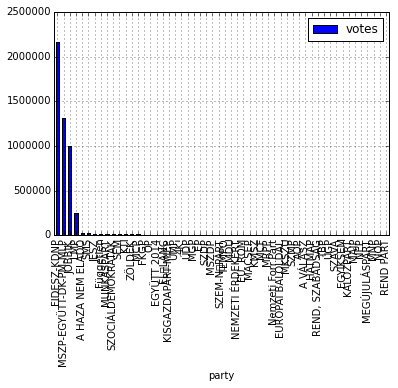

In [45]:
# Cooler! Draw a histogram!
# use this `ipython magic` to draw the plots into the notebook
%matplotlib inline
party_votes.plot(kind='bar')

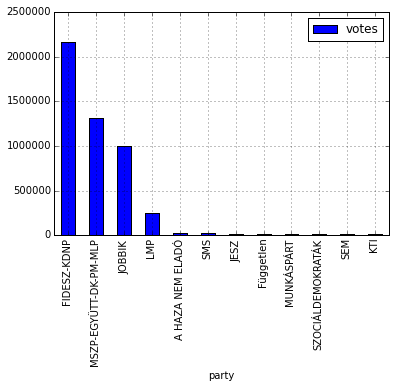

In [46]:
# Allright, let's get the ones with at least 10000 votes4
%matplotlib inline
vote10k = party_votes[(party_votes['votes'] > 10000)]
vote10k.plot(kind='bar')

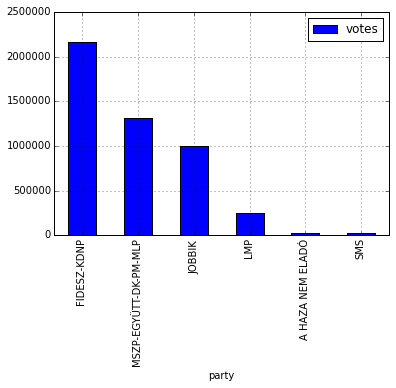

In [48]:
# Let's get the top 6!
%matplotlib inline
top6 = party_votes.head(6)
top6.plot(kind='bar')

---
###Act III: The devil lies in the details!

In [49]:
Image(url='http://searchenginewatch.com/IMG/892/265892/panda-devil.png', width=300, height=300)

In [ ]:
# Let's use the regional data too!
regional = data[['party', 'region', 'votes']].groupby(['region', 'party']).sum()
regional

In [ ]:
# Let's only have the ones with more than 5000 votes!
regional5k = regional[regional['votes'] > 5000]
regional5k

In [ ]:
# We need to convert it into a plottable format
# pivot table
regional5k.stack()

In [ ]:
# then unpivot subtable
regional5k.stack().unstack('party')

In [ ]:
# that looks like something plottable!
regional5k.stack().unstack('party').plot(kind='barh')

---
###Final Act: The pandas is strong with this one! 

In [ ]:
Image(url='http://2.bp.blogspot.com/-pgK8KdMmSn8/TsFTOwrGk9I/AAAAAAAABAk/5ondVGyw6w8/s320/Darth+Panda.jpg')

In [ ]:
# Plot the number of voters in each region!


In [ ]:
# Who would win, if Fidesz doesn't participate in the election?


In [ ]:
# Who would win by regions, if Fidesz doesn't participate in the election?
